In [1]:
# HPGe paper calibration
# Done by: Sebastian Sarasti

In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import radioactivedecay as rd
import calendar
from d_funciones import tasa, netcount, incertidumbre, area, max_peak, spec_hist, spec_s_act,spec_s_f,gauss_fit,spectrum
from datetime import datetime, date, time, timedelta

In [3]:
# import experimental data
am_e={'0cm':np.loadtxt('./e_results/Am-241/'+'Am241-0cm-CalibracionEficiencias22-10-2019.TKA'),
      '5cm':np.loadtxt('./e_results/Am-241/'+'Am241-5cm-CalibracionEficiencias22-10-2019.TKA'),
      '10cm':np.loadtxt('./e_results/Am-241/'+'Am241-10cm-CalibracionEficiencias-24-10-2019.TKA'),
      '20cm':np.loadtxt('./e_results/Am-241/'+'Am241-20cm-CalibracionEficiencias-23-10-2019.TKA'),
      '25cm':np.loadtxt('./e_results/Am-241/'+'Am241-25cm-CalibracionEficiencias-23-10-2019.TKA')
      }
co_e={'0cm':np.loadtxt('./e_results/Co-60/'+'Co60-0cm-CalibracionEficiencias-15-08-2019.TKA'),
      '5cm':np.loadtxt('./e_results/Co-60/'+'Co60-5cm-CalibracionEficiencias-24-10-2019.TKA'),
      '10cm':np.loadtxt('./e_results/Co-60/'+'Co60-10cmCalibracionEficiencias22ago2019.TKA'),
      '20cm':np.loadtxt('./e_results/Co-60/'+'Co60-20cmCalibracionEficiencias23ago2019.TKA'),
      '25cm':np.loadtxt('./e_results/Co-60/'+'Co60-25cmCalibracionEficiencias23ago2019.TKA')
      }
cs_e={'0cm':np.loadtxt('./e_results/Cs-137/'+'Cs137-0cm-CalibracionEficiencias-15-08-2019.TKA'),
      '5cm':np.loadtxt('./e_results/Cs-137/'+'Cs137-5cmcalibracioneficiencia20ago2019.TKA'),
      '10cm':np.loadtxt('./e_results/Cs-137/'+'Cs137-10cmCalibracionEficiencia22ago2019.TKA'),
      '20cm':np.loadtxt('./e_results/Cs-137/'+'Cs137-20cmCalibracionEficiencias23ago2019.TKA'),
      '25cm':np.loadtxt('./e_results/Cs-137/'+'Cs137-25cmCalibracionEficiencias27ago2019.TKA')
      }
eu_e={'0cm':np.loadtxt('./e_results/Eu-152/'+'Eu152-0cm-CalibracionEficiencias-15-09-2019.TKA'),
      '5cm':np.loadtxt('./e_results/Eu-152/'+'Eu152-5cm-CalibracionEficiencias-19-08-2019.TKA'),
      '10cm':np.loadtxt('./e_results/Eu-152/'+'Eu152-10cmCalibracionEficiencias22ago2019.TKA'),
      '20cm':np.loadtxt('./e_results/Eu-152/'+'Eu152-20cmCalibracionEficiencias23ago2019.TKA'),
      '25cm':np.loadtxt('./e_results/Eu-152/'+'Eu152-25cmCalibracionEficiencias27ago2019.TKA')
      }

In [4]:
# load background radiation
bk=np.loadtxt("./e_results/"+'afondo20min07nov2018.TKA')

In [5]:
# determination of net rate count spectra
# extract the keys of before dictionaries
claves=list(eu_e.keys())
# create an empty dictionary
am_e_n={}
cs_e_n={}
co_e_n={}
eu_e_n={}
for clave in claves:
    am_e_n[clave]=netcount(am_e[clave],bk)
    cs_e_n[clave]=netcount(cs_e[clave],bk)
    co_e_n[clave]=netcount(co_e[clave],bk)
    eu_e_n[clave]=netcount(eu_e[clave],bk)

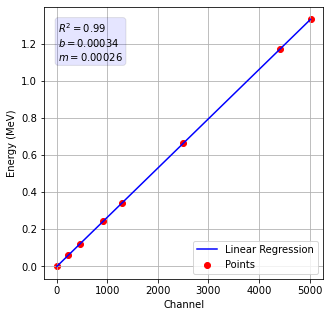

In [6]:
# make a linear regression
ca=np.array([0,223,457,921,1297,2492,4420,5020])
energia=np.array([0,0.0595,0.121,0.244,0.344,0.662,1.17,1.33])#MeV 
from scipy import stats
res = stats.linregress(ca, energia)
# save the constants like variables
r2=res[2]
m_=res[0]
b_=res[1]

    #%%

# plot the linear regresion (channel calibration)
textstr = '\n'.join((
    r'$R^2=%.2f$' % (0.99, ),
    r'$b=%.5f$' % (b_, ),
    r'$m=%.5f$' % (m_, )))
fig2=plt.figure(figsize=(5,5))
ax=plt.axes()
trans_ca=lambda x:res[0]*x+res[1]
plt.scatter(ca,energia,color='r',label='Points')
plt.plot(ca,trans_ca(ca),color='b',label='Linear Regression')
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Energy (MeV)')
plt.legend(loc=4)
props = dict(boxstyle='round', facecolor='blue', alpha=0.1)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
plt.savefig("channel_cab_hpge.png",dpi=500)
plt.show()

In [7]:
canal=np.arange(1,8191,1,dtype=int)
# generate energy vector
Energy=trans_ca(canal)

In [8]:
canal

array([   1,    2,    3, ..., 8188, 8189, 8190])

In [9]:
# generate a zero matrix to save the counts in each photopeak
areas=np.zeros((7,5))
a_am=np.array([area(am_e_n[clave],Energy,223-20,223+20) for clave in am_e_n])
a_eu1=np.array([area(eu_e_n[clave],Energy,444,473) for clave in eu_e_n])
a_eu2=np.array([area(eu_e_n[clave],Energy,921-20,921+20) for clave in eu_e_n])
a_eu3=np.array([area(eu_e_n[clave],Energy,1297-20,1297+20) for clave in eu_e_n])
a_cs=np.array([area(cs_e_n[clave],Energy,2492-20,2492+20) for clave in cs_e_n])
a_co1=np.array([area(co_e_n[clave],Energy,4000,4500) for clave in co_e_n])
a_co2=np.array([area(co_e_n[clave],Energy,4700,5250) for clave in co_e_n])
areas[0,:]=a_am
areas[1,:]=a_eu1
areas[2,:]=a_eu2
areas[3,:]=a_eu3
areas[4,:]=a_cs
areas[5,:]=a_co1
areas[6,:]=a_co2

In [10]:
areas

array([[8.88846361e-01, 1.04028385e-01, 3.80615756e-02, 1.85403600e-02,
        7.25182872e-03],
       [2.95867571e-01, 5.24590345e-02, 1.93661850e-02, 5.86205168e-03,
        3.91494391e-03],
       [4.02518328e-02, 7.67456284e-03, 3.04142705e-03, 9.70647860e-04,
        6.68256124e-04],
       [1.05154524e-01, 1.34296803e-02, 4.90359807e-03, 1.51201386e-03,
        1.02027093e-03],
       [4.85642305e-02, 5.42681063e-03, 1.92582759e-03, 5.79401767e-04,
        3.87788295e-04],
       [1.33962059e-01, 1.62418443e-02, 6.01531670e-03, 1.79853283e-03,
        1.19821875e-03],
       [6.33041768e-02, 6.79140829e-03, 2.48141102e-03, 7.36014238e-04,
        5.07505332e-04]])

In [11]:
# create a vector of energies which are used for calibration
energia_=np.array([0.0595,0.121,0.244,0.344,0.662,1.17,1.33])#MeV

In [12]:
# add the probability of emission in each decay
actf=np.array([37210.71,29118.16,8291.76,20030.49])
am_t=actf[0]*0.357
eu_t=actf[1]*0.2831
eu_t_1=actf[1]*0.0749
eu_t_2=actf[1]*0.266
cs_t=actf[2]*0.851
co_t_1=actf[3]*0.9988
co_t_2=actf[3]*1
# create a vector of each activity
cuentas_t=[]
cuentas_t.append(am_t)
cuentas_t.append(eu_t)
cuentas_t.append(eu_t_1)
cuentas_t.append(eu_t_2)
cuentas_t.append(cs_t)
cuentas_t.append(co_t_1)
cuentas_t.append(co_t_2)

In [13]:
# determinate the new activity for Co-60 at 05-March-2020
inv=rd.Inventory({'Co-60':20030.49}, 'Bq')
ac_cof=inv.decay(131, 'd')
# the result is 19107.73

In [14]:
eficiencia=np.zeros((7,5))
# determinate FEPE
for i in range(7):
    for j in range(5):
        eficiencia[i,j]=(areas[i,j]/cuentas_t[i])*100

In [15]:
areas

array([[8.88846361e-01, 1.04028385e-01, 3.80615756e-02, 1.85403600e-02,
        7.25182872e-03],
       [2.95867571e-01, 5.24590345e-02, 1.93661850e-02, 5.86205168e-03,
        3.91494391e-03],
       [4.02518328e-02, 7.67456284e-03, 3.04142705e-03, 9.70647860e-04,
        6.68256124e-04],
       [1.05154524e-01, 1.34296803e-02, 4.90359807e-03, 1.51201386e-03,
        1.02027093e-03],
       [4.85642305e-02, 5.42681063e-03, 1.92582759e-03, 5.79401767e-04,
        3.87788295e-04],
       [1.33962059e-01, 1.62418443e-02, 6.01531670e-03, 1.79853283e-03,
        1.19821875e-03],
       [6.33041768e-02, 6.79140829e-03, 2.48141102e-03, 7.36014238e-04,
        5.07505332e-04]])

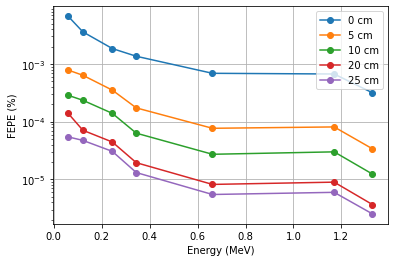

In [16]:
plt.plot(energia_,eficiencia[:,0],'o-', label='0 cm')
plt.plot(energia_,eficiencia[:,1], 'o-', label='5 cm')
plt.plot(energia_,eficiencia[:,2], 'o-', label='10 cm')
plt.plot(energia_,eficiencia[:,3], 'o-', label='20 cm')
plt.plot(energia_,eficiencia[:,4], 'o-', label='25 cm')
plt.xlabel("Energy (MeV)")
plt.ylabel("FEPE (%)")
plt.grid()
plt.legend()
plt.yscale('log')
plt.savefig('exp_cab_ener.png',dpi=500)

In [17]:
# load experimetal data
am_s={'0cm':np.loadtxt('./s_results/'+'HPGeDetector_am_pos1.dat'),
      '5cm':np.loadtxt('./s_results/'+'HPGeDetector_am_pos2.dat'),
      '10cm':np.loadtxt('./s_results/'+'HPGeDetector_am_pos3.dat'),
      '20cm':np.loadtxt('./s_results/'+'HPGeDetector_am_pos5.dat'),
      '25cm':np.loadtxt('./s_results/'+'HPGeDetector_am_pos6.dat')
      }
co_s={'0cm':np.loadtxt('./s_results/'+'HPGeDetector_co_pos1.dat'),
      '5cm':np.loadtxt('./s_results/'+'HPGeDetector_co_pos2.dat'),
      '10cm':np.loadtxt('./s_results/'+'HPGeDetector_co_pos3.dat'),
      '20cm':np.loadtxt('./s_results/'+'HPGeDetector_co_pos5.dat'),
      '25cm':np.loadtxt('./s_results/'+'HPGeDetector_co_pos6.dat')
      }
cs_s={'0cm':np.loadtxt('./s_results/'+'HPGeDetector_cs_pos1.dat'),
      '5cm':np.loadtxt('./s_results/'+'HPGeDetector_cs_pos2.dat'),
      '10cm':np.loadtxt('./s_results/'+'HPGeDetector_cs_pos3.dat'),
      '20cm':np.loadtxt('./s_results/'+'HPGeDetector_cs_pos5.dat'),
      '25cm':np.loadtxt('./s_results/'+'HPGeDetector_cs_pos6.dat')
      }
eu_s1={'0cm':np.loadtxt('./s_results/'+'HPGeDetector_eu1_pos1.dat'),
      '5cm':np.loadtxt('./s_results/'+'HPGeDetector_eu1_pos2.dat'),
      '10cm':np.loadtxt('./s_results/'+'HPGeDetector_eu1_pos3.dat'),
      '20cm':np.loadtxt('./s_results/'+'HPGeDetector_eu1_pos5.dat'),
      '25cm':np.loadtxt('./s_results/'+'HPGeDetector_eu1_pos6.dat')
      }
eu_s2={'0cm':np.loadtxt('./s_results/'+'HPGeDetector_eu2_pos1.dat'),
      '5cm':np.loadtxt('./s_results/'+'HPGeDetector_eu2_pos2.dat'),
      '10cm':np.loadtxt('./s_results/'+'HPGeDetector_eu2_pos3.dat'),
      '20cm':np.loadtxt('./s_results/'+'HPGeDetector_eu2_pos5.dat'),
      '25cm':np.loadtxt('./s_results/'+'HPGeDetector_eu2_pos6.dat')
      }
eu_s3={'0cm':np.loadtxt('./s_results/'+'HPGeDetector_eu3_pos1.dat'),
      '5cm':np.loadtxt('./s_results/'+'HPGeDetector_eu3_pos2.dat'),
      '10cm':np.loadtxt('./s_results/'+'HPGeDetector_eu3_pos3.dat'),
      '20cm':np.loadtxt('./s_results/'+'HPGeDetector_eu3_pos5.dat'),
      '25cm':np.loadtxt('./s_results/'+'HPGeDetector_eu3_pos6.dat')
      }

In [18]:
# create a energy_vector transfor with just 1 element to use the function spec_hist
Energy_=trans_ca(np.arange(1,8192,1))

In [19]:
# create an empty dictionary to save the simulated transform spectra
am_s_t={}
cs_s_t={}
co_s_t={}
eu1_s_t={}
eu2_s_t={}
eu3_s_t={}
for clave in claves:
    am_s_t[clave]=spec_hist(am_s[clave],Energy_)
    cs_s_t[clave]=spec_hist(cs_s[clave],Energy_)
    co_s_t[clave]=spec_hist(co_s[clave],Energy_)
    eu1_s_t[clave]=spec_hist(eu_s1[clave],Energy_)
    eu2_s_t[clave]=spec_hist(eu_s2[clave],Energy_)
    eu3_s_t[clave]=spec_hist(eu_s3[clave],Energy_)

In [20]:
# scale simulated spectra to activity of each radioactive source
cuentas_t
# create dictionaries to save spectra with activity correction
am_s_a={}
cs_s_a={}
co_s_a={}
eu1_s_a={}
eu2_s_a={}
eu3_s_a={}
for clave in claves:
    am_s_a[clave]=spec_s_act(am_s_t[clave],1e6,cuentas_t[0])
    eu1_s_a[clave]=spec_s_act(eu1_s_t[clave],1e6,cuentas_t[1])
    eu2_s_a[clave]=spec_s_act(eu2_s_t[clave],1e6,cuentas_t[2])
    eu3_s_a[clave]=spec_s_act(eu3_s_t[clave],1e6,cuentas_t[3])
    cs_s_a[clave]=spec_s_act(cs_s_t[clave],1e6,cuentas_t[4])
    co_s_a[clave]=spec_s_act(co_s_t[clave],1e6,cuentas_t[5])

In [21]:
# determination of correction factor between each spectrum
# extract the maximun of each experimental spectrum
m_am=np.array([max(am_e_n[clave]) for clave in claves ])
m_eu1=np.array([max(eu_e_n[clave][300:500]) for clave in claves ])
m_eu2=np.array([max(eu_e_n[clave][750:1000]) for clave in claves ])
m_eu3=np.array([max(eu_e_n[clave][1250:1400]) for clave in claves ])
m_cs=np.array([max(cs_e_n[clave][2000:3000]) for clave in claves ])
m_co1=np.array([max(co_e_n[clave][4000:4500]) for clave in claves ])
m_co2=np.array([max(co_e_n[clave][4700:5250]) for clave in claves ])


In [22]:
# extract the maximun of each simulated spectrum
m_am_s=np.array([max(am_s_a[clave][1]) for clave in claves ])
m_eu1_s=np.array([max(eu1_s_a[clave][1][300:500]) for clave in claves ])
m_eu2_s=np.array([max(eu2_s_a[clave][1][750:1000]) for clave in claves ])
m_eu3_s=np.array([max(eu3_s_a[clave][1][1250:1400]) for clave in claves ])
m_cs_s=np.array([max(cs_s_a[clave][1][2000:3000]) for clave in claves ])
m_co1_s=np.array([max(co_s_a[clave][1][4200:4500]) for clave in claves ])
m_co2_s=np.array([max(co_s_a[clave][1][4700:5250]) for clave in claves ])

In [23]:
# verify the maximum of each spectrum
f_am=m_am_s/m_am
f_eu1=m_eu1_s/m_eu1
f_eu2=m_eu2_s/m_eu2
f_eu3=m_eu3_s/m_eu3
f_cs=m_cs_s/m_cs
f_co1=m_co1_s/m_co1
f_co2=m_co2_s/m_co2

In [24]:
print(m_eu1_s,m_eu1)


[2576.81384915  282.92005297   90.88294583   26.33750675   17.2780639 ] [278.15805556  50.05763889  18.22694444   5.47583333   3.65986111]


In [25]:
factores=pd.DataFrame(index=['Am-241 59.5 keV','Eu-152 121 keV','Eu-152 244 keV',
                             'Eu-152 344 keV','Cs-137 662 keV','Co-60 1173 keV','Co-60 1332 keV'], 
                      columns=['0 cm', '5 cm', '10 cm',  '20 cm', '25 cm'])
factores.iloc[0,:]=f_am
factores.iloc[1,:]=f_eu1
factores.iloc[2,:]=f_eu2
factores.iloc[3,:]=f_eu3
factores.iloc[4,:]=f_cs
factores.iloc[5,:]=f_co1
factores.iloc[6,:]=f_co2

In [26]:
# generate the mean
factores['Mean']=factores.mean(axis='columns')

In [27]:
factores['Standard deviation']=factores.std(axis='columns')

In [28]:
factores.head()

,0 cm,5 cm,10 cm,20 cm,25 cm,Mean,Standard deviation
Am-241 59.5 keV,5.140521,5.181251,4.348695,2.457052,4.147093,4.254922,0.989457
Eu-152 121 keV,9.263848,5.651886,4.986187,4.809771,4.720962,5.886531,1.719878
Eu-152 244 keV,13.930196,6.681265,6.016515,5.665935,5.598074,7.578397,3.199027
Eu-152 344 keV,9.680531,7.442181,6.695973,6.613153,6.248767,7.336121,1.234692
Cs-137 662 keV,9.608262,8.269331,7.791589,7.550638,7.662434,8.176451,0.756661


In [29]:
# scale the simulated spetra with mean correction factor
# create dictionaries to save spectra with activity correction
am_s_s={}
cs_s_s={}
co_s_s={}
eu1_s_s={}
eu2_s_s={}
eu3_s_s={}
for clave in claves:
    am_s_s[clave]=spec_s_f(am_s_a[clave],factores.iloc[0,5])
    eu1_s_s[clave]=spec_s_f(eu1_s_a[clave],factores.iloc[1,5])
    eu2_s_s[clave]=spec_s_f(eu2_s_a[clave],factores.iloc[2,5])
    eu3_s_s[clave]=spec_s_f(eu3_s_a[clave],factores.iloc[3,5])
    cs_s_s[clave]=spec_s_f(cs_s_a[clave],factores.iloc[4,5])
    co_s_s[clave]=spec_s_f(co_s_a[clave],factores.iloc[5,5])

In [30]:
# determinate the maximum of expertimental spectra and simulated spectra through
# ratio among max photo peaks
# the maximum of experimental spectra
m_am_e=np.array([max_peak(am_e_n[clave],223-20,223+20) for clave in am_e_n])
m_eu1_e=np.array([max_peak(eu_e_n[clave],444,473) for clave in eu_e_n])
m_eu2_e=np.array([max_peak(eu_e_n[clave],921-20,921+20) for clave in eu_e_n])
m_eu3_e=np.array([max_peak(eu_e_n[clave],1297-20,1297+20) for clave in eu_e_n])
m_cs_e=np.array([max_peak(cs_e_n[clave],2492-20,2492+20) for clave in cs_e_n])
m_co1_e=np.array([max_peak(co_e_n[clave],4000,4500) for clave in co_e_n])
m_co2_e=np.array([max_peak(co_e_n[clave],4700,5250) for clave in co_e_n])

# the maximum of simulated spectra
m_am_s=np.array([max_peak(am_s_s[clave][1],223-20,223+20) for clave in am_s_s])
m_eu1_s=np.array([max_peak(eu1_s_s[clave][1],444,473) for clave in eu1_s_s])
m_eu2_s=np.array([max_peak(eu2_s_s[clave][1],921-20,921+20) for clave in eu2_s_s])
m_eu3_s=np.array([max_peak(eu3_s_s[clave][1],1297-20,1297+20) for clave in eu3_s_s])
m_cs_s=np.array([max_peak(cs_s_s[clave][1],2492-20,2492+20) for clave in cs_s_s])
m_co1_s=np.array([max_peak(co_s_s[clave][1],4000,4500) for clave in co_s_s])
m_co2_s=np.array([max_peak(co_s_s[clave][1],4700,5250) for clave in co_s_s])

In [31]:
# matrix of experimental max photopeaks values
m_e=np.zeros((7,5))
m_e[0,:]=m_am_e
m_e[1,:]=m_eu1_e
m_e[2,:]=m_eu2_e
m_e[3,:]=m_eu3_e
m_e[4,:]=m_cs_e
m_e[5,:]=m_co1_e
m_e[6,:]=m_co2_e

# matrix of experimental max photopeaks values
m_s=np.zeros((7,5))
m_s[0,:]=m_am_s
m_s[1,:]=m_eu1_s
m_s[2,:]=m_eu2_s
m_s[3,:]=m_eu3_s
m_s[4,:]=m_cs_s
m_s[5,:]=m_co1_s
m_s[6,:]=m_co2_s
m_s

array([[1.05447125e+03, 1.26253939e+02, 3.92883003e+01, 1.08648510e+01,
        7.13083899e+00],
       [4.37747465e+02, 4.80622751e+01, 1.54391359e+01, 4.47419856e+00,
        2.93518629e+00],
       [4.51900393e+01, 4.57952514e+00, 1.50885756e+00, 4.39447929e-01,
        2.96706493e-01],
       [1.04078033e+02, 1.02095252e+01, 3.31730385e+00, 9.73441805e-01,
        6.29253054e-01],
       [3.76622404e+01, 3.58835947e+00, 1.17713379e+00, 3.52967538e-01,
        2.38188363e-01],
       [3.39449191e+01, 3.65585169e+00, 1.30591411e+00, 4.05222670e-01,
        3.00820323e-01],
       [2.99847081e+01, 3.18338683e+00, 1.09887894e+00, 2.91972666e-01,
        1.82261725e-01]])

In [32]:
# estimate the error between simulated and experimental FEPE
error=np.zeros((7,5))
# determinate FEPE simulated
error= np.absolute(m_s-m_e)
error=error/m_e*100

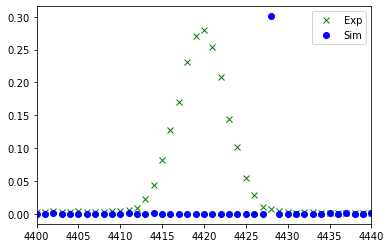

In [33]:
plt.plot(canal,co_e_n['25cm'], 'xg',label='Exp')
plt.plot(canal,co_s_s['25cm'][1],'ob', label='Sim')
plt.xlim(4420-20,4420+20)
plt.legend()

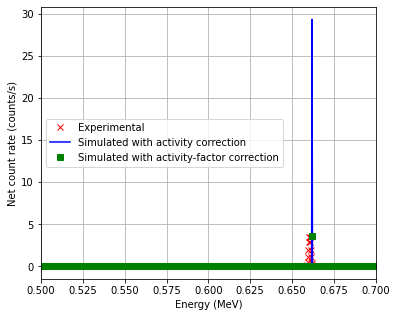

In [34]:
#plot the experimental, simulated with activity correction, and activity-factor correction
fig3=plt.figure(figsize=(6,5))
plt.plot(Energy, cs_e_n['5cm'], 'xr',label='Experimental')
plt.plot(cs_s_a['5cm'][0], cs_s_a['5cm'][1], '-b',label='Simulated with activity correction')
plt.plot(cs_s_s['5cm'][0], cs_s_s['5cm'][1], 'sg',label='Simulated with activity-factor correction')
plt.grid()
plt.ylabel('Net count rate (counts/s)')
plt.xlabel('Energy (MeV)')
plt.xlim(0.5,0.7)
#plt.yscale('log')
plt.legend(loc='center left')
plt.savefig('spectras_com.png', dpi=500)

In [35]:
d_error=pd.DataFrame(error,index=['Am-241 59.5 keV','Eu-152 121 keV','Eu-152 244 keV',
                             'Eu-152 344 keV','Cs-137 662 keV','Co-60 1173 keV','Co-60 1332 keV'],
                      columns=['0 cm', '5 cm', '10 cm','20 cm', '25 cm'])
d_error

,0 cm,5 cm,10 cm,20 cm,25 cm
Am-241 59.5 keV,20.813514,21.770746,2.203862,42.253887,2.534236
Eu-152 121 keV,57.373643,3.986132,15.294986,18.291915,19.800610
Eu-152 244 keV,83.814542,11.838019,20.609658,25.235702,26.131164
Eu-152 344 keV,31.957082,1.445718,8.725972,9.854907,14.821922
Cs-137 662 keV,17.511400,1.135944,4.706956,7.653842,6.286546
Co-60 1173 keV,5.672428,3.387293,7.545904,2.388651,7.649420
Co-60 1332 keV,15.774799,3.824901,4.491449,13.985139,20.080121


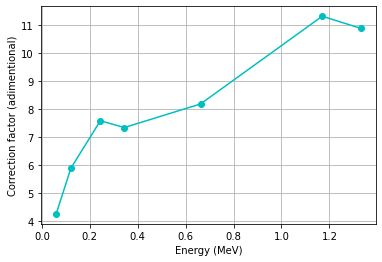

In [36]:
plt.plot(energia_,factores['Mean'], 'o-c')
plt.xlabel('Energy (MeV)')
plt.ylabel('Correction factor (adimentional)')
plt.grid()
plt.savefig('correction_f_r.jpg', dpi=500)

